In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [23]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.57', '1.1.0')

In [24]:
torch.cuda.set_device(0)

In [25]:
!pwd

/home/gaurav/PycharmProjects/nlp-for-panjabi/language-model


In [26]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-panjabi/language-model')

In [27]:
from inltk.tokenizer import PanjabiTokenizer

In [28]:
PanjabiTokenizer

inltk.tokenizer.PanjabiTokenizer

In [29]:
# class PanjabiTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"panjabi_lm.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [30]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/panjabi_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [31]:
itos[:20]

['<unk>',
 '<s>',
 '</s>',
 '।',
 ',',
 '▁ਹੈ',
 '▁ਦੇ',
 '▁',
 '▁ਵਿੱਚ',
 '▁ਦੀ',
 '▁ਅਤੇ',
 '▁ਦਾ',
 '▁ਨੂੰ',
 '▁ਇੱਕ',
 '▁ਹਨ',
 '-',
 '▁ਤੋਂ',
 '.',
 '▁ਸੀ',
 '▁ਤੇ']

In [32]:
# 30,000 is the vocab size that we chose in sentencepiece
panjabi_vocab = Vocab(itos)

In [33]:
panjabi_tok = PanjabiTokenizer('pa')

In [34]:
tokenizer = Tokenizer(tok_func=PanjabiTokenizer, lang='pa')

In [35]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [36]:
data_lm = TextLMDataBunch.from_folder(path=path/'ulmfit', tokenizer=tokenizer, vocab=panjabi_vocab)

In [37]:
data_lm.save()

In [38]:
data_lm.show_batch()

idx,text
0,"▁ਇਹ ▁ ਮਾਦਾਗਾਸਕਰ ▁ਦੇ ▁ਪੱਛਮ ▁ਵੱਲ ▁ਪੈਂਦਾ ▁ਹੈ ▁ਅਤੇ ▁ਜੋ ▁ਸਭ ▁ਤੋਂ ▁ਨੇੜਲ ੇ ▁ਟਾਪੂ , ▁ਮਾਰੀਸ਼ਸ ▁ਤੋਂ ▁200 ▁ਕਿ . ਮੀ . ▁ਦੱਖਣ - ਪੱਛਮ ▁ਵੱਲ ▁ਹੈ । ▁ਪ੍ਰਸ਼ਾਸਕੀ ▁ਤੌਰ ▁ਉੱਤੇ ▁ਇਹ ▁ਫ਼ਰਾਂਸ ▁ਦਾ ▁ਇੱਕ ▁ਵਿਦੇਸ਼ੀ ▁ਵਿਭਾਗ ▁ਹੈ । ▁ਹੋਰ ▁ਵਿਦੇਸ਼ੀ ▁ਵਿਭਾਗਾਂ ▁ਵਾਂਗ ▁ਇਹ ▁ਫ਼ਰਾਂਸ ▁ਦੇ ▁27 ▁ਖੇਤਰਾਂ ▁ਵਿੱਚੋਂ ▁ਇੱਕ ▁ਹੈ ▁ਅਤੇ ▁ਗਣਰਾਜ ▁ਦਾ ▁ਅਨਿੱਖੜਵ ਾਂ ▁ਹਿੱਸਾ ▁ਹੈ ▁ਜਿਸਦਾ ▁ਦਰਜਾ ▁ਉਹੀ ▁ਹੈ ▁ਜੋ ▁ਮਹਾਂਦੀਪ ੀ ▁ਯੂਰਪ ▁ਵਿੱਚ ▁ਸਥਿੱਤ ▁ਖੇਤਰਾਂ"
1,"▁ਤਲਵੰਡੀ ▁ਸਾਬੋ , ਦੇ ▁ਨੇੜੇ ▁ਪਿੰਡ ▁ਵਾਂਗਰ ▁ਆ ▁ਵੱਸੇ ▁ਸਨ । ▁x x bo s ▁ਸਾਰਾ ▁ਜੋਜ਼ਫ ਼ ▁ਜਾਂ ▁ਸਾਰਾ ▁ਜੋਸਫ਼ ▁ਇੱਕ ▁ਮਲਿਆਲਮ ▁ਨਾਵਲਕਾਰ ▁ਅਤੇ ▁ਨਿੱਕੀ ▁ਕਹਾਣੀ ▁ਲੇਖਕ ▁ਹੈ । ▁ਉਸ ▁ਨੇ ▁ਆਪਣੇ ▁ਨਾਵਲ ▁ਪਰਮੇਸ਼ੁਰ ▁ਪਿਤਾ ▁ਦੀਆਂ ▁ਧੀਆਂ ▁ਲਈ ▁ਸਾਹਿਤ ▁ਅਕਾਦਮੀ ▁ਅਵਾਰਡ ▁ਜਿੱਤਿਆ । ▁ਉਸੇ ▁ਹੀ ▁ਨਾਵਲ ▁ਲਈ ▁ਉਸਨੇ ▁ਵਾਇ ਲਾ ਰ ▁ਅਵਾਰਡ ▁ਵੀ ▁ਪ੍ਰਾਪਤ ▁ਕੀਤਾ । ▁ਸਾਰਾਹ ▁ਕੇਰਲਾ ▁ਵਿੱਚ ▁ਨਾਰੀਵਾਦੀ ▁ਲਹਿਰ ▁ਦੀ ▁ਮੋਹਰੀ ▁ਹੈ ▁ਅਤੇ ▁ਸੋਚ ਵਾਨ ▁ਮਹਿਲਾਵਾਂ ▁ਦੇ"
2,▁ਸੰਸਥਾ ਈ ▁ਦੇ ▁ਅਰਥਾਂ ▁ਵਿੱਚ ▁ਪ੍ਰਭਾਸ਼ਿਤ ▁ਕੀਤਾ ▁ਜਾਂਦਾ ▁ਹੈ ▁ਪ੍ਰ ੰਤੂ ▁ਮਾਰਕਸ ੀ ▁ਚਿੰਤਨ ▁ਦੇ ▁ਦੋਰਾਨ ▁ਇਹ ▁ਸੰਕਲਪ ▁ਵਿਚਾਰਧਾਰਕ ▁ਅਰਥਾਂ ▁ਵਿੱਚ ▁ਵਰਤਿਆ ▁ਗਿਆ ▁ਹੈ । ▁ਗ੍ਰਾਮ ਸ਼ੀ ▁ਦੇ ▁ਅਨੁਸਾਰ ▁ਇਹ ▁ਸੰਕਲਪ ▁ਕੇਵਲ ▁ਸਮਝਣ ▁ਵਿੱਚ ▁ਹੀ ▁ਨਹੀਂ ▁ਸਗੋਂ ▁ਸੱਤਾ ▁ਪਰਿਵਰਤਨ ▁ਵਿੱਚ ▁ਵਧੇਰੇ ▁ਮਦਦਗਾਰ ▁ਹੋ ▁ਸਕਦਾ ▁ਹੈ ▁। ▁ਸੱਤਾ ▁ਸ਼ੈਲੀ ▁ਜਮਾਤ ▁ਵਿੱਚ ▁ਹੈ ਜ ਮਨੀ ▁ਦੇ ▁ਨਾਲ ▁ਸੱਤਾ ▁ਨੂੰ ▁ਚਿਰਸਥਾਈ ▁ਬਣਾਉਦੀ ▁ਹੈ । ਹੈ ਜ ਮਨੀ ▁ਪੂੰਜੀਵਾਦ ▁ਦਾ ▁ਸੁਰਖਿਆ ▁ਕਵਚ ▁ਹੈ ।
3,"▁130 ▁ਯਾਤਰੀ ▁ਸੈਰਗਾਹ ਾਂ ▁ਦਾ ▁ਛੋਟਾ ▁ਨਮੂਨਾ ▁ਤਿਆਰ ▁ਕੀਤਾ ▁ਗਿਆ ▁ਹੈ । ▁ਇਹ ▁ਥੀਮ ▁48 ▁ਹੈਕਟੇਅਰ ▁ਵਿੱਚ ▁ਬਣਿਆ ▁ਹੋਇਆ ▁ਹੈ । ▁ਇੱਥੇ ▁108 ▁ਮੀਟਰ ▁ਉੱਚਾ ▁ਆਈ ਫ਼ਲ ▁ਟਾਵਰ , ▁ਪਿਰਾਮਿਡ ▁ਤੇ ▁ਤਾਜ ▁ਮਹਿਲ ▁ਵੀ ▁ਬਣਾਇਆ ▁ਗਿਆ ▁ਹੈ । ▁ਸੰਸਾਰ ▁ਦੀ ▁ਖਿੜਕੀ ▁ਸ਼ੈਨ ਜ਼ ੈਨ ▁ਮੈਟਰੋ ▁ਦੀ ▁ਲਾਈਨ ▁1 ▁ਤੇ ▁ਲਾਈਨ ▁2 ▁ਕੋਲ ▁ਸਥਿੱਤ ▁ਹੈ । ▁ਹੈ ਪੀ - ਲਾਈਨ ▁ਨਾਂਅ ▁ਦੀ ▁ਛੋਟੀ ▁ਰੇਲ ▁ਸੰਸਾਰ ▁ਦੀ ▁ਖਿੜਕੀ ▁ਦੇ ▁ਨੇੜੇ ▁ਰੁਕ ਦੀ"
4,▁ਤੱਕ ▁ਵੈਦਿਕ ▁ਕਰਮ - ਕਾਂ ਡ ਾਂ ▁ਦਾ ▁ਅਸਰ ▁ਘੱਟ ▁ਹੋ ▁ਗਿਆ । ▁ਇਸਦੇ ▁ਫਲਸਰੂਪ ▁ਕਈ ▁ਧਾਰਮਿਕ ▁ਪੰਥਕ ਾਂ ▁ਅਤੇ ▁ਸੰਪਰਦਾ ਵਾਂ ▁ਦੀ ▁ਸਥਾਪਨਾ ▁ਹੋ ▁ਗਈ । ▁ੳੁਸ ▁ਸਮੇਂ ▁ਦੀਆਂ ▁ਲਗਭਗ ▁62 ▁ਸੰਪਰਦਾ ਵਾਂ ▁ਦੇ ▁ਬਾਰੇ ▁ਜਾਣਕਾਰੀ ▁ਮਿਲਦੀ ▁ਹੈ । ▁ਪਰ ▁ਇਨ੍ਹਾਂ ▁ਵਿਚੋਂ ▁ਦੋ ▁ਹੀ ▁ਲੰਬੇ ▁ਸਮੇਂ ▁ਤੱਕ ▁ਪ੍ਰਭਾਵਿਤ ▁ਕਰ ▁ਸਕੀਆਂ ▁- ▁ਬੁੱ । ਧ ▁ਅਤੇ ▁ਜੈਨ ▁ਜੈਨ ▁ਧਰਮ ▁ਦੇ ▁ਦੋ ▁ਤੀਰਥ ਕਰ ▁ਰਿਸ਼ਭ ਨਾਥ ▁ਅਤੇ ▁ਅਰ ਿਸ਼ਟ ਨੇ ਮੀ


In [39]:
len(data_lm.vocab.itos)

30000

In [71]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False)

In [41]:
it = iter(data_lm.valid_dl)
its = [next(it) for i in range(3)]
[(len(x),len(y)) for x,y in its]

[(64, 64), (64, 64), (64, 64)]

In [42]:
its[0]

[tensor([[  351,  1326,  9410,  ...,  2881,    36,     3],
         [    3,   716,    30,  ...,     6,  1624,    35],
         [  181,   238,    15,  ..., 10452,    71,    16],
         ...,
         [ 9496,   758,   112,  ...,  1447,  2405,    73],
         [    5,   125,    57,  ...,     4,   282,   140],
         [   42,     5,     4,  ...,     4,    29,   984]], device='cuda:0'),
 tensor([[1326, 9410,  189,  ...,   36,    3,  114],
         [ 716,   30, 1121,  ..., 1624,   35,  363],
         [ 238,   15,  634,  ...,   71,   16,  392],
         ...,
         [ 758,  112, 5499,  ..., 2405,   73,   11],
         [ 125,   57,  161,  ...,  282,  140,    9],
         [   5,    4,  256,  ...,   29,  984,  724]], device='cuda:0')]

In [43]:
x = its[1][0][0].cpu().numpy()

In [44]:
y = its[1][1][0].cpu().numpy()

In [45]:
panjabi_vocab.textify(x)

'▁ਜਦੋਂ ▁ਕਿ ▁ਪੁਰਸ਼ ▁ਵਰਗ ▁ਦੇ ▁ਮੈਚ ▁ਪਹਿਲੀ ▁ਦਸੰਬਰ ▁ਤੋਂ ▁15 ▁ਦਸੰਬਰ ▁ਤੱਕ ▁ਖੇਡੇ ▁ਗਏ । ▁ਪਹਿਲਾ ▁ਵਿਸ਼ਵ ▁ਕੱਪ ▁ਮਹਿਲਾ ▁ਕਬੱਡੀ ▁ਮੁਕਾਬਲਾ ▁11 ▁ਨਵੰਬਰ ▁ਤੋਂ ▁20 ▁ਨਵੰਬਰ ▁2011 ▁ਤੱਕ ▁ਹੋਇਆ ▁ਅਤੇ ▁ਭਾਰਤ , ▁ਅਮਰੀਕਾ , ਇੰਗ ਲ ੈਡ , ਇ ਰਾਨ ▁ਦੀਆਂ ▁ਟੀਮਾਂ ▁ਨੇ ▁ਹਿੱਸਾ ▁ਲਿਆ । ▁ਇਸ ▁ਵਿਸ਼ਵ ▁ਕੱਪ ▁ਦਾ ▁ਉਦਘਾਟਨ ੀ ▁ਮੈਚ ▁ਸ਼੍ਰੀ ▁ਅੰਮ੍ਰਿਤਸਰ ▁ਵਿਖੇ ▁ਭਾਰਤ ▁ਵੱਲੋਂ ▁ਅਮਰੀਕਾ ▁ਨੂੰ ▁ਮਾਤ ▁ਦੇਣ ▁ਵਾਲਾ ▁ਸੀ । ▁ਫਾਈਨਲ ▁ਭਾਰਤੀ ▁ਟੀਮ ▁ਨੇ ▁ਪ੍ਰਿਯੰ'

In [46]:
panjabi_vocab.textify(y)

'▁ਕਿ ▁ਪੁਰਸ਼ ▁ਵਰਗ ▁ਦੇ ▁ਮੈਚ ▁ਪਹਿਲੀ ▁ਦਸੰਬਰ ▁ਤੋਂ ▁15 ▁ਦਸੰਬਰ ▁ਤੱਕ ▁ਖੇਡੇ ▁ਗਏ । ▁ਪਹਿਲਾ ▁ਵਿਸ਼ਵ ▁ਕੱਪ ▁ਮਹਿਲਾ ▁ਕਬੱਡੀ ▁ਮੁਕਾਬਲਾ ▁11 ▁ਨਵੰਬਰ ▁ਤੋਂ ▁20 ▁ਨਵੰਬਰ ▁2011 ▁ਤੱਕ ▁ਹੋਇਆ ▁ਅਤੇ ▁ਭਾਰਤ , ▁ਅਮਰੀਕਾ , ਇੰਗ ਲ ੈਡ , ਇ ਰਾਨ ▁ਦੀਆਂ ▁ਟੀਮਾਂ ▁ਨੇ ▁ਹਿੱਸਾ ▁ਲਿਆ । ▁ਇਸ ▁ਵਿਸ਼ਵ ▁ਕੱਪ ▁ਦਾ ▁ਉਦਘਾਟਨ ੀ ▁ਮੈਚ ▁ਸ਼੍ਰੀ ▁ਅੰਮ੍ਰਿਤਸਰ ▁ਵਿਖੇ ▁ਭਾਰਤ ▁ਵੱਲੋਂ ▁ਅਮਰੀਕਾ ▁ਨੂੰ ▁ਮਾਤ ▁ਦੇਣ ▁ਵਾਲਾ ▁ਸੀ । ▁ਫਾਈਨਲ ▁ਭਾਰਤੀ ▁ਟੀਮ ▁ਨੇ ▁ਪ੍ਰਿਯੰ ਕਾ'

In [47]:
panjabi_vocab.numericalize(['▁ਮੈਚ'])

[1497]

In [48]:
for x in range(30000):
    if panjabi_vocab.textify([x]) == ' ':
        print(x)

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


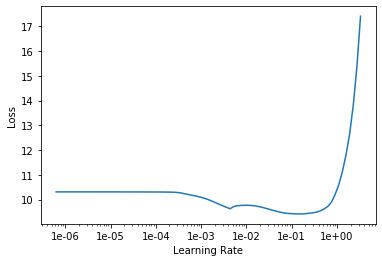

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.203168,4.173241,0.336765,07:17


In [52]:
learn.fit_one_cycle(20, 1e-3, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='accuracy', name='model')])

epoch,train_loss,valid_loss,accuracy,time
0,4.471998,4.130526,0.342275,07:14
1,4.110007,4.064913,0.350988,07:15
2,4.273418,3.968239,0.364381,07:17
3,4.034815,3.864774,0.378087,07:18
4,4.158146,3.756247,0.393066,07:17
5,3.822302,3.654641,0.407450,07:17
6,3.572192,3.576002,0.418782,07:18
7,3.895708,3.505578,0.428599,07:20
8,3.769912,3.447200,0.437128,07:20
9,3.442327,3.399135,0.444299,07:22


Better model found at epoch 0 with accuracy value: 0.3422750234603882.
Better model found at epoch 1 with accuracy value: 0.3509877026081085.
Better model found at epoch 2 with accuracy value: 0.36438122391700745.
Better model found at epoch 3 with accuracy value: 0.37808656692504883.
Better model found at epoch 4 with accuracy value: 0.39306631684303284.
Better model found at epoch 5 with accuracy value: 0.40745022892951965.
Better model found at epoch 6 with accuracy value: 0.418782114982605.
Better model found at epoch 7 with accuracy value: 0.4285992383956909.
Better model found at epoch 8 with accuracy value: 0.4371279180049896.
Better model found at epoch 9 with accuracy value: 0.44429904222488403.
Better model found at epoch 10 with accuracy value: 0.4521491229534149.
Better model found at epoch 11 with accuracy value: 0.4572451114654541.
Better model found at epoch 12 with accuracy value: 0.4623686969280243.
Better model found at epoch 13 with accuracy value: 0.4665742814540863

In [91]:
learn.load('model')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (0 items)
x: LMTextList

y: LMLabelList

Path: /home/gaurav/PycharmProjects/nlp-for-panjabi/language-model/ulmfit;

Valid: LabelList (0 items)
x: LMTextList

y: LMLabelList

Path: /home/gaurav/PycharmProjects/nlp-for-panjabi/language-model/ulmfit;

Test: None, model=SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(30000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(30000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_featur

In [92]:
learn.predict("ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ", n_words=20)

'ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ ▁ਸਨ , ▁ਉਹ ▁ਕਹਿ ▁ਸਕਦੇ ▁ਸਨ ▁ਕਿ ▁ਦੁਨੀਆ ▁ਵਿੱਚ ▁ਕੇਵਲ ▁ਵਰਗ ▁ਨੰਬਰ ▁ਹੀ ▁ਚੱਲਣ ਗੇ ▁ਅਤੇ ▁ਮਾਲੀ ਅੱਪ , ▁ਵਿਦ'

In [94]:
np.exp(3.194855)

24.406634473709282

In [95]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()

In [96]:
path

PosixPath('/home/gaurav/PycharmProjects/nlp-for-panjabi/language-model')

In [97]:
defaults.device = torch.device('cpu')

In [98]:
learn = load_learner(path / 'ulmfit')

In [99]:
class SimTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/panjabi_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [100]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

30000

In [101]:
# cosine similarity - to check quality of our sentence encoder
def cos_sim(v1,v2):
    return F.cosine_similarity(Tensor(v1).unsqueeze(0),Tensor(v2).unsqueeze(0)).mean()

In [102]:
tokzr = SimTokenizer('pa')

In [103]:
m = learn.model

In [104]:
def get_sentence_encoding(sen: str):
    tok = tokzr.tokenizer(sen)
    itok = [stoi[o] for o in tok]
    kk0=m[0](Tensor([itok]).to(torch.int64))
    return kk0[0][-1][0][-1]

In [105]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(30000, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(30000, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=30000, bias=True)
    (output_dp): RNNDropout()
  )
)

In [106]:
# learn.model.reset()

In [108]:
cos_sim(get_sentence_encoding('ਮੈਂ ਇੱਕ ਇੰਜੀਨੀਅਰ ਹਾਂ'), get_sentence_encoding('ਮੈਂ ਇੱਕ ਵਿਗਿਆਨੀ ਹਾਂ'))

tensor(0.9702, grad_fn=<MeanBackward0>)

In [109]:
encoder = get_model(learn.model)[0]

In [110]:
encoder.state_dict()['encoder.weight'].shape

torch.Size([30000, 400])

In [111]:
embeddings = encoder.state_dict()['encoder.weight']

In [112]:
embeddings = np.array(embeddings)

In [113]:
embeddings[0].shape

(400,)

In [114]:
df = pd.DataFrame(embeddings)

In [115]:
df.shape

(30000, 400)

In [116]:
df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

In [117]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.140282,-0.225343,0.091468,0.011365,-0.310435,0.077559,-0.281492,-0.145012,0.110380,0.042910,...,-0.239947,-0.308760,-0.238303,-0.485958,-0.057103,0.143763,0.110702,0.363513,0.079273,0.176225
1,0.183305,0.114005,0.069757,-0.008010,0.134767,-0.434507,-0.048521,0.736425,0.558313,-0.448053,...,0.144730,-0.582009,0.396604,-0.267547,0.326207,-0.070736,0.020819,0.018771,-0.123859,-0.179403
2,0.191932,0.123115,0.046383,-0.031767,0.117007,-0.451134,-0.073051,0.725868,0.603333,-0.455077,...,0.134402,-0.528279,0.464334,-0.258254,0.381179,-0.088745,0.101923,0.032493,-0.056860,-0.093209
3,0.088915,-0.059428,-0.051685,-0.526063,-0.297504,-0.408362,0.076437,-0.474722,0.818335,0.874931,...,-0.554428,0.576551,-0.420845,-0.003464,-0.787426,0.458704,-0.407183,0.035293,-0.087827,0.178226
4,0.183615,-0.011866,-0.038603,0.277777,-0.279680,-0.034423,0.075204,-0.205440,-0.229140,0.084468,...,0.388677,0.429169,0.103357,-0.067368,-0.212850,0.047030,-0.035661,0.089389,0.304978,0.121831


In [118]:
df.shape

(30000, 400)

In [119]:
df2 = pd.DataFrame(itos)

In [120]:
df2.head()

,0
0,<unk>
1,<s>
2,</s>
3,।
4,","


In [121]:
df2.shape

(30000, 1)

In [122]:
df2.to_csv('embeddings_metadata.tsv', sep='\t', index=False, header=False)

In [124]:
encoder.state_dict()['encoder.weight'][1]

tensor([ 1.8331e-01,  1.1401e-01,  6.9757e-02, -8.0097e-03,  1.3477e-01,
        -4.3451e-01, -4.8521e-02,  7.3642e-01,  5.5831e-01, -4.4805e-01,
         4.1779e-01, -4.0786e-01, -4.9131e-02, -2.0829e-01,  5.0597e-01,
        -1.9850e-02,  1.2749e-01, -2.3876e-01, -4.2928e-01, -8.5025e-02,
         2.0596e-01,  1.9414e-01,  6.4829e-01,  4.7474e-01,  3.5983e-01,
        -2.2773e-01, -7.1285e-02,  2.4566e-01, -1.1817e-01, -1.1535e-01,
        -5.4512e-01, -5.3683e-01,  6.9024e-01,  2.4939e-01, -3.1712e-01,
        -8.7909e-02,  2.4285e-01,  3.7806e-01,  2.5010e-01,  2.0399e-01,
        -1.3696e+00, -1.5009e-02, -7.3518e-02,  1.4213e-01,  8.9581e-02,
        -1.7816e-01,  1.6978e-01,  1.1304e-01,  1.0411e-01,  1.9364e-03,
        -1.4154e-01, -1.5627e-01,  1.5109e-01, -1.9176e-01, -4.9787e-01,
         1.4117e-01, -3.2164e-01, -4.1506e-01,  7.6289e-02,  5.6813e-01,
        -1.8736e-01, -5.1530e-01, -4.7499e-01, -2.3766e-01, -4.4076e-01,
         3.6593e-01, -1.3064e-01, -1.7359e-01, -1.8